# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


### Linear Regression:
- *With the assumption that the relationship between our independent and dependent variables is linear*, we can use a __Linear Regression__ model to find said relationship. In 2 dimensions, this can be represented as a __line of best fit__, which is a line drawn such that our __loss function__ (such as our mean squared error) is __minimized__. Probabilistically, we can interpret this as finding the *probability of y knowing x and theta*.

### Polynomial Regression:
- However, what if our assumption is wrong? In most real world cases, our data will be __distributed in a more complex way__. In order to capture that, we will need more than a simple line. __Polynomial Regression__ is a method that allows us to __linearize our hypothesis__ by working in a __higher dimensional space__. We then say that the model remains __linear with respect to its parameters__.

### Common issues:
- __Overfitting__ occurs when a model is “overtrained”: the model performs exceptionally well on our training data but not on the testing data. This is because the model went as far as __capturing the training data’s noise__. 
- On the other hand, __underfitting__ happens when a model __fails__ to capture the __underlying trend__ of data. 
- *In short, the former shows low bias & high variance whereas the latter shows low variance & high bias*.


### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

### What is Logistic Regression?
- Despite “Regression” being in its name, __Logistic Regression__ is actually used in __classification__ problems. More specifically, Logistic Regression is used when we have __continuous input__ and we’re looking to model the probability that a __discrete Y__ belongs to a certain class, say in {0,1}. In this model, the loss function we’re trying to minimize is __logistic loss__.

### SVMs: Definition
- A Linear SVM can be used to solve __binary classification__ problems by turning them into __constrained optimization problems__, solvable using __Lagrange Multipliers__. It accomplishes that task by designing a __hyperplane__ that classifies all training vectors in two classes.

- Often times, multiple hyperplanes are able to achieve this task: we’re interested in the optimal hyperplane, the one that results in the __maximum total margin__ (simply put, the highest distance between our data and hyperplane). By doing so, we maximize the separability of our data. 

- __Support Vectors__ are the data points that lie the __closest__ to the decision hyperplane. They have __direct bearing__ on the optimum location of the hyperplane and hence are __the most difficult to classify__. These vectors __define the hyperplane__.

#### What if our data is not perfectly seperable?
- Sometimes, a training set can __violate the linear separability criterion__: our two categories are separated with the __exception__ of some points. __Slack variables__ allow some instances to fall off the margin but, by doing so, penalizes them. Essentially, they're a way of measuring that error.

- Finally, when our data isn’t linearly separable (to an extent that __slack variables can’t fix__), we can attempt to __gain linear separability in a higher dimensional space__. We do so by mapping our data to said space, using specific functions called __kernel functions__.


### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- Explain the "training" and "testing" phase of a k-NN model. List out the key steps.
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

### Supervised and Unsupervised Learning
- Typically used for classification, __supervised learning__ is done using a __ground truth__: this means that our samples are __labelled__ with the correct (desired) output prior to training. The whole process is aimed at __approximating a function that best approximates the relationship between our features and targets__. 
- On the other hand, __unsupervised learning__ is used to __find/learn__ the __inherent structure__ of our data without explicitly providing our labels first. 

### More about kNNs
- A KNN algorithm falls under the __lazy learning__ category: there is __no explicit training phase__ before we use it. This means that data generalization/abstraction is __made upon classification__, allowing us to virtually eliminate training time. 
- However, this comes at the price of requiring us to __load our entire training set in memory__. For that reason, KNN works best on __smaller datasets with less features__. Other reasons to use KNNs include ease of output interpretation and low calculation time.

#### The main steps for a KNN algorithm are as follows:

   1. __Compute the distance__ between the item to be classified and every other item in our training set. The distance can be computed using  Euclidian distance, cosine similarity amongst other ways.
  
   2. __Pick the k data points with the lowest distance__ (where k is chosen by the user)
  
   3. Conduct a __“majority vote”__ amongst those data points, meaning that the dominating classification in that pool       is   decided as the final classification.




we can clearly see that in the first examples, out points form clusters making it better for KNN's
following the same logic, using a KNN in the second example would be a bad idea


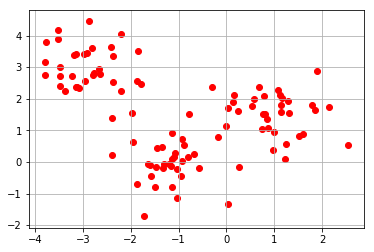

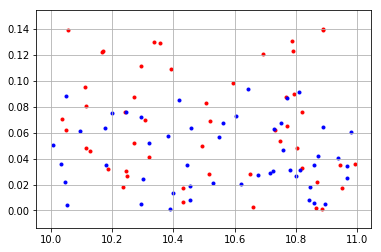

In [234]:
import sklearn.datasets
from sklearn.datasets.samples_generator import make_blobs

middle = [(-3,3), (1,1.5), (-1.5,0)]
cluster_std = [0.7,0.7,0.7]
X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers = middle, n_features = 2, random_state=1)
plt.figure()
plt.scatter(X[y==0,0], X[y==0,1], color = 'red')
plt.scatter(X[y==1,0], X[y==1,1], color = 'red')
plt.scatter(X[y==2,0], X[y==2,1], color = 'red')
plt.grid()

vertical_1=np.random.rand(50)/7
horizontal_1=np.random.rand(50)+10
vertical_2=np.random.rand(50)/10
horizontal_2=np.random.rand(50)+10

plt.figure()
plt.scatter(horizontal_1, vertical_1, marker = '.', c='r')
plt.scatter(horizontal_2, vertical_2, marker = '.', c='b')
plt.grid()


print("we can clearly see that in the first examples, out points form clusters making it better for KNN's")
print("following the same logic, using a KNN in the second example would be a bad idea")

### 4) k-NN Implementation
- Implement the "training" phase of a k-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [38]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import math
import operator
from IPython.display import display, Math, Latex

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()

## YOUR CODE HERE
#first, we create a function that calculates euclidean distance between two instances of our data
def euclideanDistance(data1, data2, nb_features):
    distance = 0
    for x in range(nb_features):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)


#then, we proceed to create our knn
def knn(trainingSet, testSet, k):
    #after initializing our distances array, we populate it using our previously defined euclidean distance function
    distances = {}
    for x in range(0, len(trainingSet)):
        distances[x] = euclideanDistance(trainingSet.iloc[x],
                                         testSet, testSet.shape[1])[0]
    #we then sort our distances array to get the nearest neighbours at the beginning of the array
    sorted_distances = sorted(distances.items(), key=operator.itemgetter(1))
    #after defining a neighbours array, we populate it with our k nearest neighbours
    neighbours = []
    for x in range(0,k):
        neighbours.append(sorted_distances[x][0])
    
    #finally, we use a for loop with an empty votes array that increments a class' index by 1 when said
    #class receives a vote
    all_votes = {}
    for x in range(len(neighbours)):
        vote = trainingSet.iloc[neighbours[x]][-1]
        if vote in all_votes:
            all_votes[vote] += 1
        else:
            all_votes[vote] = 1
    
    sorted_votes = sorted(all_votes.items(), key=operator.itemgetter(1),
                          reverse=True)
    #we then return our majority vote
    return(sorted_votes[0][0], neighbours)

##########################################################################
#to test our knn out, we use a random testSet with four arbitrarily chosen features
data = iris_df
testSet = [[1, 2, 3, 4]]
test = pd.DataFrame(testSet)
k = 3
result, neighbours_nb = knn(data, test, k)
print(result)
print(neighbours_nb)

#Note: we can compare our results with SciKit's inbuilt KNN
#from sklearn.neighbors import KNeighborsClassifier
#KNN = KNeighborsClassifier(3)
#KNN.fit(data.iloc[:,0:4], data['target'])
#print(KNN.predict(test))
#print(KNN.kneighbors(test)[1])

1.0
[106, 57, 93]


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

Instead of using a single model, Ensemble methods is a technique that combines several of the latter to produce a single final model. This allows for a decrease in variance, producing a more reliable classification. Some of these methods include: 

### Bagging and Boosting
#### Bagging:
- Bootstrap Aggregating, commonly known as bagging, is a method that combines both __Bootstrapping and Aggregation__ to form one model.

- The algorithm first creates __subsets__ of the original data in a randomly (*with replacement*, meaning that multiple instances of the same data can be ina. subset). These "bootstrapped subsamples" are referred to as bags.

- We then proceed by feeding those bags into __seperate models__ to train them. Upon testing, we query each of these models with the same input X and take the __mean of our outputs__ Y as the ensemble's prediction.

#### Boosting: a variation on Bagging
- Boosting algorithms start by randomly selecting from the training data, akin to bagging. We then train a model with this first bag's data and proceed to test this model __using all of our training data__.

- When randomly selecting data to fill our "second bag", a new factor is taken into consideration. The training data is now weighted: data instances that that led to failed predictions in the model will have a higher weight. This is used to train our second model.

- The cycle then continues: we use our training data to test __the ensemble formed by our previous models__ and the instances of data that led to failed predictions with this ensemble are more likely to end up in a subsequent bag.

- In short: __Boosting tries to add new models that do well where previous models fail__

##### Which method should one use?
- Both models result in a model with __higher stability__. However, in situations where the model gets __low performance__ (*underfitting*), __Boosting__ could lead to lower errors whereas bagging will rarely get a better bias.
- On the other hand, if the issue is *overfitting*, then __bagging__ is the way to go. __Boosting__ would only make the problem __worse__, being an ensemble method that gives more importance to individual models with better performance on __training data__.

### Trees and Random Forests:

#### Decision Trees:
- A __Decision tree__ is commonly used to solve __classification__ problems. It does that by __recursively splitting our training data__ into subsets, ideally until every subset is "pure" (all of the elements in the subset belong to a single class).
- It's drawn upside down, with its root at the top. The tree splits into __"branches" (edges)__ and the edge of a branch is a __"leaf"__, corresponding to our __decision__. 
- __"Growing"__ a tree via recursive binary splitting is referred to as a __greedy algorithm__, with a __desire of lowering cost__. This is reflected in splitting, as each splitting of a node has a cost (reflected by metrics such as a __Gini score__). 
- A large set of features can result in a large and complex tree which can cause __overfitting__. Therefore, we need to know when to stop growing, using metrics such as maximum depth (length of the longest path from a root to a leaf of a tree).

#### Random Forests:
- Another supervised learning algorithm, __Random Forest__ is an __ensemble of Decision Trees__. In short, the algorithm __builds multiple decision trees and merges them together__ to get a more accurate, stable prediction (see previous section on ensemble methods). It does that by __averaging__ the trees' results.
- The "random" aspect of this algorithm is that only a random subset of the features is taken into consideration for splitting a node. The best feature __among this random subset__ is searched for while growing the trees. 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#999;margin:0px auto;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#999;color:#444;background-color:#F7FDFA;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#999;color:#fff;background-color:#26ADE4;}
.tg .tg-yyde{font-size:15px;font-family:"Palatino Linotype", "Book Antiqua", Palatino, serif !important;;border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-yyde"></th>
    <th class="tg-yyde">PROS</th>
    <th class="tg-yyde">CONS</th>
  </tr>
  <tr>
    <td class="tg-yyde">Random Forest</td>
    <td class="tg-yyde">1) Easy to use model that can be used<br> for both regression and classification tasks.<br>2) Makes it easy to view the relative <br>importance assigned to the input features.<br>3) With enough trees, overfitting is not an issue.<br> Variance is also reduced (relative to decision trees)</td>
    <td class="tg-yyde">1) Large number of trees can make <br>algorithm slow, inefficient<br>2) Poor performance on imbalanced data <br>3) Hard to visually interpret<br></td>
  </tr>
  <tr>
    <td class="tg-yyde">Decision Trees</td>
    <td class="tg-yyde">1) Easy to visually interpret <br>(compared to random forests)<br>2) Allows for data classification <br>with less calculations<br>3) Fast testing time, O(depth) complexity</td>
    <td class="tg-yyde">1) Prone to overfitting<br>2) Greedy algorithm, may not <br>find the best tree<br>3) Limited in the kind of splits <br>it makes in the data: only axis-aligned splits</td>
  </tr>
</table>



### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

### How does PCA achieve dimensionality reduction?
__PCA is a Linear Dimensionality Reduction method__ that ensures that our variables are independent of one another with the drawback of making them less interpretable.

- This algorithm achieves dimensionality reduction by __projecting the data onto a lower dimension linear subspace__. The criterion for this projection is that it must __maximize variance__.
- In more mathematical terms, we define PCA as a __selection of a basis of maximal variance__. It uses an __orthogonal transformation__ to convert a set of __possibly dependent variables__ into a set of __linearly independent variables called principal components__, effectively forming a __basis__.
- To find the "most relevant" dimension, we use what is referred to as a __covariance matrix__, a matrix that essentially summarizes how our variables realte to one another (representing variance along different axes).

_A more detailed explanation of the covariance matrix and eigendecompositions will follow._


#### The PCA algorithm goes as follows:
1. Seperate the data in order to obtain a matrix of __independent variables__ X, then proceed to __substract the mean__ of that column from each entry (creating a column with a mean of 0). Call that matrix Z.

_Note: standardizing the data is optional_
2. Calculate the __covariance matrix__ (sigma) using the following formula:

\begin{equation}
\Sigma = Z^TZ
\end{equation}
3. Calculate the __eigenvectors__ and their corresponding __eigenvalues__ with regard to the covariance matrix in order to find its __eigendecomposition__:

\begin{equation}
\Sigma = Z^TZ = PDP^{-1}
\end{equation}

4. The covariance matrix' eigenvalues are now on the __diagonal__ of the matrix D. __Sort__ them from largest to smallest and sort their corresponding eigenvectors (columns of P) accordingly. 

5. __Select the k eigenvectors with the highest eigenvalues (k most relevant components)__. These vectors will form the basis whose span is the subspace on which we will project.

6. _Alternatively, we can pick our k most relevant components via cross validation_.



### Eigenvectors, Eigenvalues and the covariance matrix.

__Why subtract the mean__ while computing the covariance matrix? 
Centering the data is actually not a requirement, but it makes __computation much easier__. By subtracting the mean, we're effectively creating a matrix with a __mean of 0__. If we take a look at the covariance matrix __formula__ (ignoring the constant 1/n):

\begin{equation}
C={\sum_{i=0}^{N}(x_{i}-\mu_{x})(x_{i}-\mu_{x})^T}
\end{equation}

Notice how setting the mean equal to 0 instantly simplifies the formula. This is how we obtain the formula in step 2 of the algorithm.

Secondly, what are eigenvectors and eigenvalues and why are they important?
The answer lies in the fundamental concepts of __linear algebra__ that PCA relies on.

The covariance matrix is a __symmetric, positive semidefinite matrix.__ This is crucial information: it tells us that this matrix is __diagonalizable.__ 
_When we look at the very meaning of diagonalizability, the importance of this property in PCA becomes very clear._

A diagonalizable matrix is a matrix that is __similar to a diagonal matrix__, meaning that there exists a basis where the representation of said matrix is diagonal. 

This magical basis is actually none other than an eigenbasis. The resulting condition is that there needs to be enough linearly independent eigenvectors to form such a basis (the rest follows by design).
__How does all this relate to Principal Component Analysis?__
We know that our covariance matrix is diagonalizable and we found its decomposition. The matrix P is actually the change of basis matrix that brings us to the eigenbasis: our previously defined condition thus tells us that its columns are __linearly independent__, which explains why our principal components will __always be independent__.




### Autoencoders

Autoencoders are more powerful than PCA, allowing us to perform __non linear dimensionality reduction__ by utilizing the flexibility of neural networks. 

An autoencoder, essentially, is a neural network that is trying to __learn an approximation to the identity function__. Its goal is to do so _without memorizing/overfitting the data_. Why does such a trivial function matter? By having a hidden layer with less neurons than the input layer, the network is forced to learn a __"compressed"__representation__ of the input and __"reconstruct"__ the input. 

There are methods that can achieve that task without a smaller number of nodes. These include __L1 Regularization__, imposing a sparsity constraint (__sparse autoencoders__), etc.


##### Special case:

We have previously mentionned that autoencoders are superior to PCA, having the ability to perform dimensionality reduction on both linear & non-linear systems. 
This makes it clear that __both methods__ can be used for linear dimensionality reduction: In fact, _a single layer autoencoder with a linear transfer function is nearly equivalent to PCA.




### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [43]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


(1288, 1850)
[14128807.0, 15280253.0, 15970708.0, 16849688.0, 17649870.0, 18083826.0, 19662750.0, 20455566.0, 21860646.0, 22832008.0, 23809358.0, 27488192.0, 29294858.0, 30717006.0, 32617594.0, 35111840.0, 35987536.0, 41078420.0, 50180932.0, 53856300.0, 63915616.0, 67940200.0, 70277070.0, 82552460.0, 101140640.0, 171418770.0, 201243070.0, 242401760.0, 502443780.0, 627988350.0]


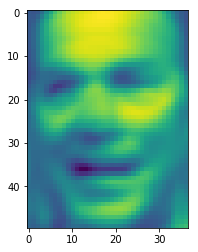

In [213]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

### insert your code here ###
print(X.shape)

#center covariance matrix and find eigenvalues
X_average_row = np.average(X, axis=0)
X_bar = X-X_average_row
sigma = X_bar.T.dot(X_bar)

eigenvalues, _ = np.linalg.eig(sigma)
eigenvalues = sorted(eigenvalues)
print(eigenvalues[len(eigenvalues)-30:])


k = 32
pca = PCA(n_components=k)
pca.fit(X)

X_pca = pca.transform(X)

X_recon = pca.inverse_transform(X_pca)
plt.imshow(X_recon[1].reshape(h,w))
#that's some freaky stuff 



In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train = X_pca[:1000]
X_test = X_pca[1000:]
y_train = y[:1000]
y_test = y[1000:]

forest = RandomForestClassifier(n_estimators = 5238)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.65625


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [ ]:
#DISCLAIMER: couldn't test and debug the algorithm in time, but i'm pretty sure the backpropagation calculus
#in the backward() and delta_l() methods is correct. The whole thing should, in theory, run (hopefully)

In [208]:
import numpy as np

In [205]:
class layer:
    def __init__(self, nb_nodes, nb_next):
        self.nb_nodes = nb_nodes
        self.A = np.zeros([nb_nodes,1])
        self.Z = np.zeros([nb_nodes,1])
        self.W = np.random.normal(0, 0.001, size=(nb_nodes, nb_next)
        self.B = np.random.normal(0, 0.001, size=(1, nb_next))
class final_layer:
    def __init__(self, nb_nodes, nb_next):
        self.nb_nodes = nb_nodes
        self.A = np.zeros([nb_nodes,1])  
        self.Z = np.zeros([nb_nodes,1])
        self.W = None
        self.B = None

In [222]:
class FFNN_two:
    def __init__(self, nb_nodes):
        self.nb_layers = 4
        self.nb_nodes = nb_nodes
        
        self.layers = []
        self.layers.append(layer(nb_nodes[0], nb_nodes[1]))
        self.layers.append(layer(nb_nodes[1], nb_nodes[2]))
        self.layers.append(layer(nb_nodes[2], nb_nodes[3]))
        self.layers.append(final_layer(nb_nodes[3], nb_nodes[0]))
        

    def train(self, batch_size, inputs, labels, num_epochs, learning_rate):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        for j in range(num_epochs):
            i = 0
            print("epoch: ", j)
            while i != (len(inputs)-batch_size):
                self.error = 0 
                self.forward(inputs[i:i+batch_size])
                self.calculate_error(labels[i:i+batch_size])
                self.backward(labels[i:i+batch_size], learning_rate)
                i += batch_size
            
    def sigmoid(self, layer):
        return np.divide(1, np.add(1, np.exp(np.negative(layer))))

    def diff_sigmoid(self, layer):
        return np.multiply(sigmoid(self,layer)(1-sigmoid(self,layer)))
    
    def mean_squared_error(self, labels):
        self.error += np.negative(np.sum
                                  (np.multiply(labels,
                                               np.log(self.layers[3].A))))
    def forward(self, inputs):
        self.layers[0].A = inputs
        for i in range(3):
            temp = np.add(np.matmul
                          (self.layers[i].A, self.layers[i].W), self.layers[i].B)
            self.layers[i+1].Z = temp
            self.layers[i+1].A = self.sigmoid(temp)
        return self.layers[3].A
            
    def delta_l(self, targets, i):
        #this algorithm will be implemented in a recursive manner
        #our base case is the last layer. 
        if (i>3):
            return
        if (i==3):
            delta = np.dot(np.subtract(self.layers[3].A, targets), 
                           self.diff_sigmoid(self.layers[3].Z))
            return delta
        else:
            if (i != 0):
                delta = np.dot(np.matmul(self.layers[i].W, self.delta_l(self, targets, i+1)),
                               self.diff_sigmoid(self.layers[i].A))
                return delta
            else:
                delta = np.dot(np.matmul(self.layers[i].W, self.delta_l(self, targets, i+1)),
                               self.diff_sigmoid(self.layers[i].Z)) 
                return delta
     
    def backward(self, targets, learning_rate):
        weight_gradient = np.matmul((self.layers[0].A), self.delta_l(targets, 0).T)
        bias_gradient = self.delta_l(targets,0).T
        self.layers[0].W -= learning_rate*weight_gradient
        self.layers[0].B -= learning_rate*bias_gradient

            
    def predict(self, test_data):
        self.batch_size = 1
        self.forward(test_data)
        a = self.layers[2].A
        a[np.where(a==np.max(a))] = 1
        a[np.where(a!=np.max(a))] = 0
        return a
